# Демонстрация. Расчет размера групп для произвольного распределения и произвольной метрики

<span style="color: red;">Считается долго!</span>

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, norm
import seaborn as sns
import matplotlib.pyplot as plt
import time

import pickle

In [4]:
%%time
np.random.seed(42)

n_iter = 100
boot_samples = 100
effect_sizes = [0.030, 0.035, 0.04, 0.045]
sample_sizes = [2000, 3000, 4000, 5000]

effect_sizes_m = []
shares_m = []
powers_m = []
sample_sizes_m = []


def metric(nums) -> float:
    return np.quantile(nums, 0.1)   # <------ метрика — десятый квантиль

alpha = 0.05
beta = 0.2
power = 1 - beta

for effect_size in effect_sizes:
    for sample_size in sample_sizes:
        print(effect_size, sample_size)
        rejected = 0
        for i in range(n_iter):
            boot_diffs = []
            for boot_sample in range(boot_samples):
                control = np.random.gamma(1, 2, size=sample_size)                    # <------ распределение не нормальное
                treatment = np.random.gamma(1, 2, size=sample_size) + effect_size    # <------ распределение не нормальное

                diff_value = metric(treatment) - metric(control)
                boot_diffs.append(diff_value)
            
            left_q, right_q = np.quantile(boot_diffs, alpha/2), np.quantile(boot_diffs, 1 - alpha/2)
            if not (left_q <= 0 <= right_q):
                rejected += 1
            
        proportion = rejected / n_iter # truly rejected, must be 1 - beta
        
        effect_sizes_m.append(effect_size)
        sample_sizes_m.append(sample_size)
        powers_m.append(proportion)

0.03 2000
0.03 3000
0.03 4000
0.03 5000
0.035 2000
0.035 3000
0.035 4000
0.035 5000
0.04 2000
0.04 3000
0.04 4000
0.04 5000
0.045 2000
0.045 3000
0.045 4000
0.045 5000
CPU times: total: 44.3 s
Wall time: 44.3 s


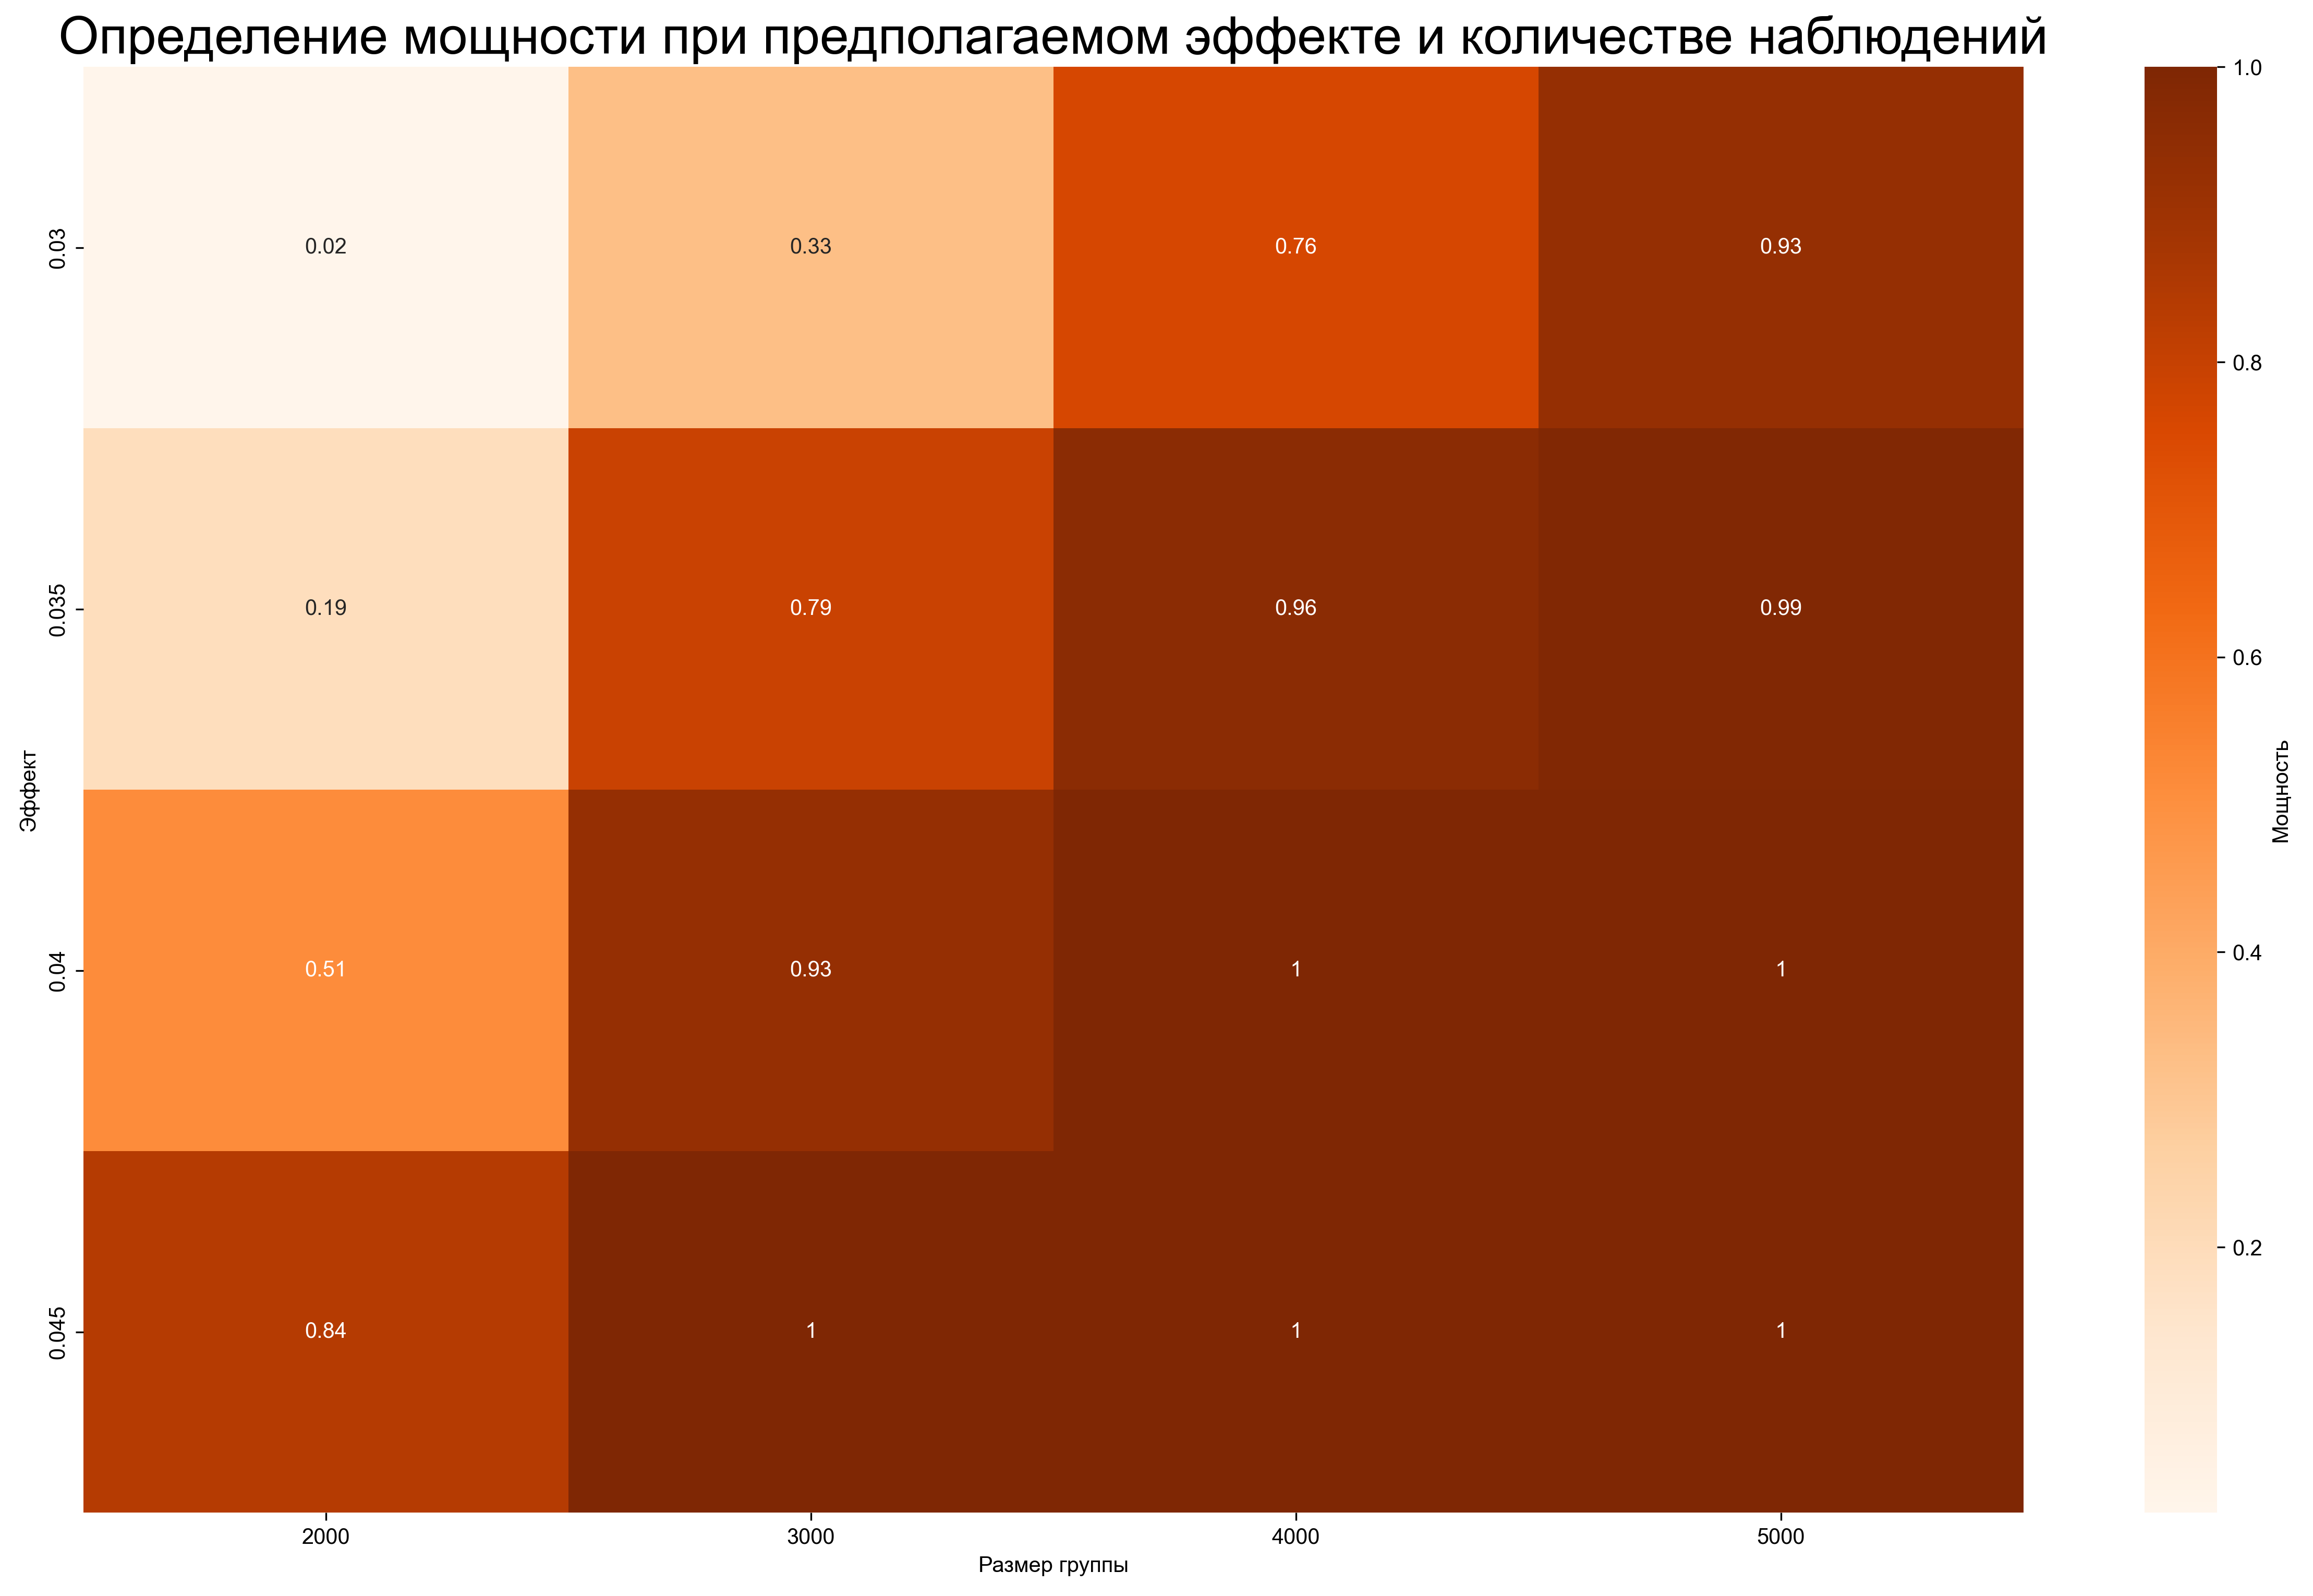

In [5]:
data = pd.DataFrame({
    'effect_size': effect_sizes_m,
    'sample_size': sample_sizes_m,
    'power': powers_m
})

data_pivot__ = data.pivot(index='effect_size', columns='sample_size', values='power')

plt.figure(figsize=(20, 12), dpi=300)
sns.heatmap(data_pivot__, cmap='Oranges', annot=True, fmt='g', cbar_kws={'label': 'Мощность'})
sns.set(font_scale=2)
plt.title('Определение мощности при предполагаемом эффекте и количестве наблюдений')
plt.xlabel('Размер группы')
plt.ylabel('Эффект')
# plt.show()
plt.savefig('Итоги имитации.png')